# Scatter Plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Run the line below to download the dataset

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/4_ThreeNum.csv > 4_ThreeNum.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6806  100  6806    0     0  15061      0 --:--:-- --:--:-- --:--:-- 15260


In [3]:
gdp_df = pd.read_csv('4_ThreeNum.csv')
gdp_df.head()

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640


In [4]:
gdp_df.describe()

,lifeExp,pop,gdpPercap
count,142.000000,1.420000e+02,142.000000
mean,67.007423,4.402122e+07,11680.071820
std,12.073021,1.476214e+08,12859.937337
min,39.613000,1.995790e+05,277.551859
25%,57.160250,4.508034e+06,1624.842248
50%,71.935500,1.051753e+07,6124.371108
75%,76.413250,3.121004e+07,18008.835640
max,82.603000,1.318683e+09,49357.190170


## Part 1

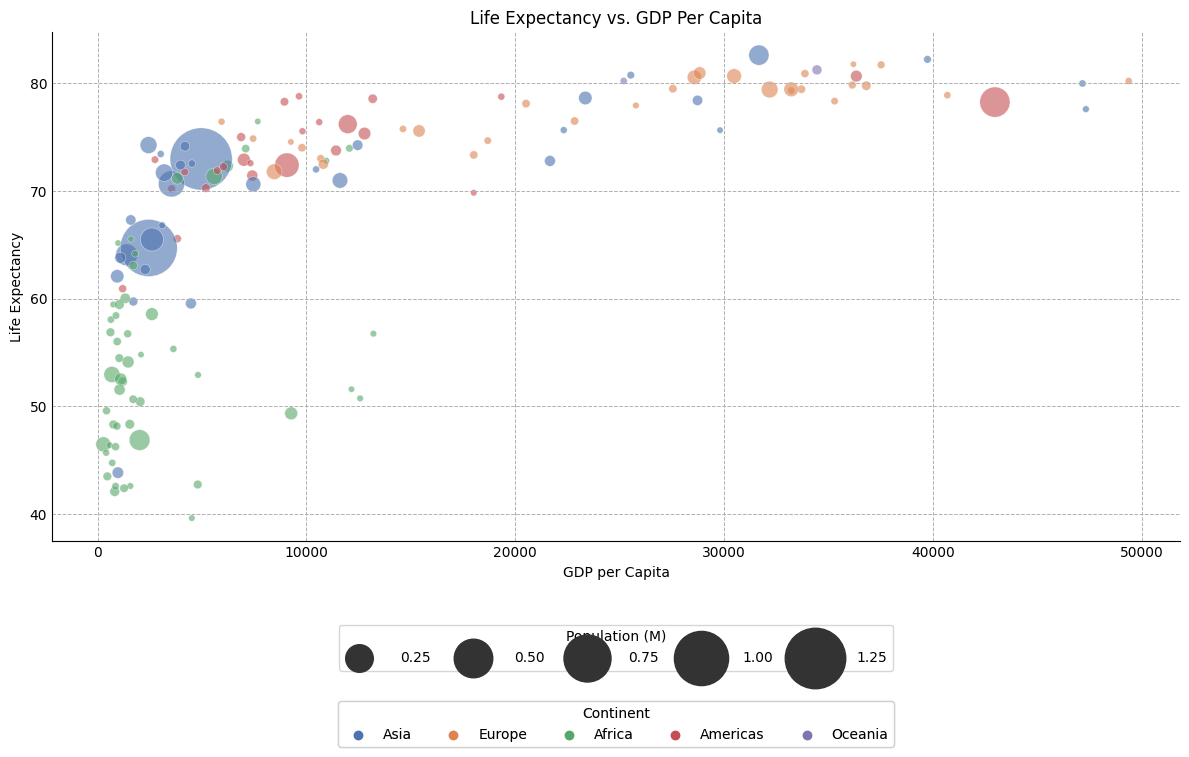

In [25]:
# Load data
gdp_df = pd.read_csv('4_ThreeNum.csv')

# Create a scatter plot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=gdp_df, x='gdpPercap', y='lifeExp', hue='continent', size='pop',
                     sizes=(20, 2000), alpha=0.6, palette="deep")

# Title and labels
plt.title('Life Expectancy vs. GDP Per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')

# Space out the size legend entries
size_legend = ax.legend(handles=handles[-5:], labels=labels[-5:], title='Population (M)', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, handletextpad=2)

# Create a separate legend for the hue (continents)
hue_legend = ax.legend(handles=handles[1:6], labels=labels[1:6], title='Continent', loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=5)

# Now, add both legends back to the plot
ax.add_artist(size_legend)
ax.add_artist(hue_legend)

# Adjust grid, spine and ticks for better visualization
ax.grid(True, which='both', linestyle='--', linewidth=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

## Part 2

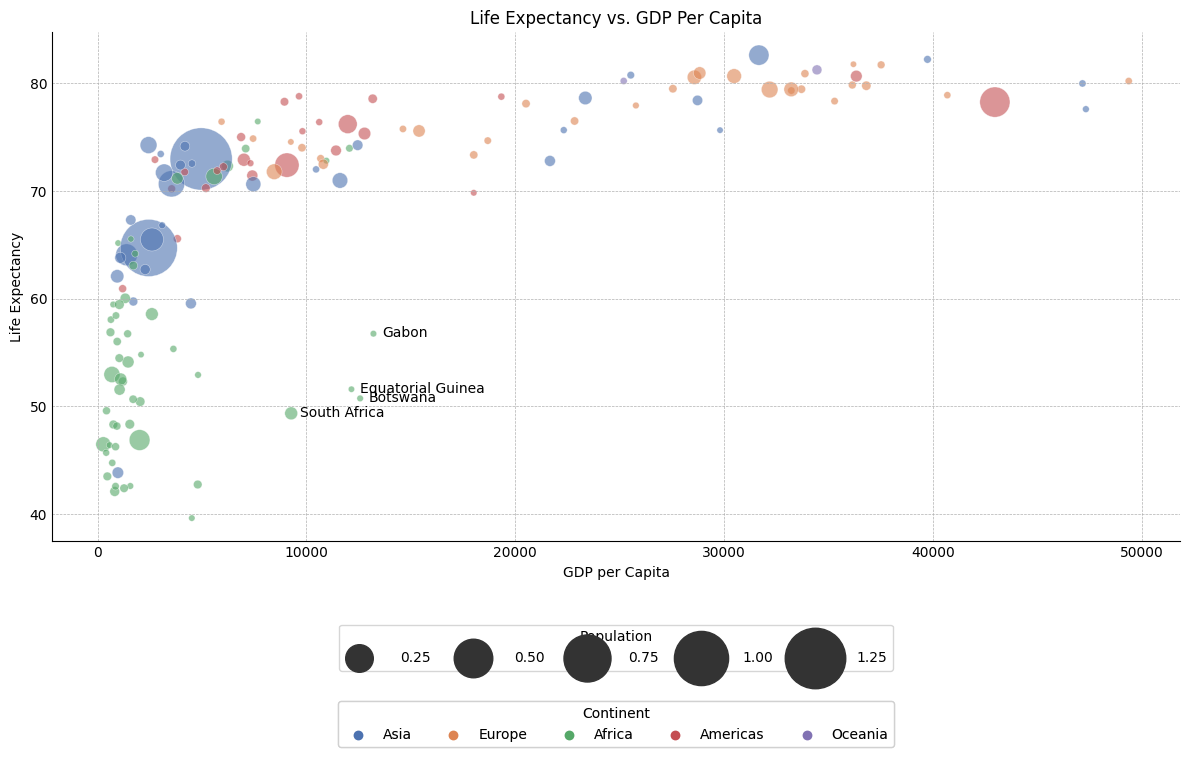

In [34]:
# Load data
gdp_df = pd.read_csv('4_ThreeNum.csv')

# Create a scatter plot
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=gdp_df, x='gdpPercap', y='lifeExp', hue='continent', size='pop',
                     sizes=(20, 2000), alpha=0.6, palette='deep')

# Title and labels
plt.title('Life Expectancy vs. GDP Per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')

# Space out the size legend entries
size_legend = ax.legend(handles=handles[-5:], labels=labels[-5:], title='Population', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, handletextpad=2)

# Create a separate legend for the hue (continents)
hue_legend = ax.legend(handles=handles[1:6], labels=labels[1:6], title='Continent', loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=5)

# Add both legends back to the plot
ax.add_artist(size_legend)
ax.add_artist(hue_legend)

# Add a slight offset to the x and y positions
x_offset = 400  # Adjust as needed
y_offset = -0.3

# Add country labels for countries meeting the specified criteria
for _, row in gdp_df.iterrows():
    if row['gdpPercap'] > 5000 and row['lifeExp'] < 65:
        ax.text(row['gdpPercap'] + x_offset, row['lifeExp'] + y_offset, row['country'])

# Adjust grid, spine and ticks for better visualization
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.tight_layout()
plt.show()

## 3. Interactive plot with plotly

In [35]:
import plotly.express as px

In [38]:
# Create an interactive scatter plot with Plotly Express
fig = px.scatter(gdp_df, 
                 x='gdpPercap', 
                 y='lifeExp', 
                 size='pop', 
                 color='continent',
                 hover_name='country', 
                 hover_data=['gdpPercap', 'lifeExp', 'pop'],
                 title='GDP per Capita vs. Life Expectancy',
                 labels={'gdpPercap': 'GDP per Capita', 'lifeExp': 'Life Expectancy', 'pop': 'Population'},
                 size_max=60)
fig.show()